# The Spies Among US

 Which citizens should be placed under close surveillance?

__________________________

In [173]:
# Setup
import pandas as pd
import numpy as np
#import pandas_profiling as pp
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import label_binarize
import joblib
import warnings
warnings.filterwarnings("ignore")

In [174]:
# Import data
df_train = pd.read_csv('espionage_data.csv')
df_test = pd.read_csv('espionage_data_test.csv')

In [175]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       8000 non-null   int64  
 1   ID_ORIGINAL              8000 non-null   int64  
 2   Gender                   8000 non-null   object 
 3   Foreign_Citizenship      7862 non-null   object 
 4   Age                      8000 non-null   int64  
 5   Frequent_Traveler        7923 non-null   object 
 6   Cellphone_Usage          8000 non-null   object 
 7   Household_Size           7670 non-null   float64
 8   Spy                      8000 non-null   int64  
 9   Satisfaction_Level       7670 non-null   float64
 10  Occupation               7876 non-null   object 
 11  Political_Participation  7876 non-null   object 
 12  Social_Person            7924 non-null   object 
 13  Area_Residence           7924 non-null   object 
 14  Military_Service        

In [176]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       493 non-null    int64  
 1   ID_ORIGINAL              493 non-null    int64  
 2   Gender                   493 non-null    object 
 3   Foreign_Citizenship      486 non-null    object 
 4   Age                      493 non-null    int64  
 5   Frequent_Traveler        490 non-null    object 
 6   Cellphone_Usage          493 non-null    object 
 7   Household_Size           476 non-null    float64
 8   Satisfaction_Level       476 non-null    float64
 9   Occupation               489 non-null    object 
 10  Political_Participation  489 non-null    object 
 11  Social_Person            485 non-null    object 
 12  Area_Residence           485 non-null    object 
 13  Military_Service         485 non-null    object 
 14  Household_Income         4

In [177]:
# Generate profiling report
#df_train['Spy'] = df_train['Spy'].astype('float64')
#df_train['Spy'] = df_train['Spy'].astype('object')
#prof_train = pp.ProfileReport(df_train)
#prof_train.to_file(output_file='output_train.html')

#prof_test = pp.ProfileReport(df_test)
#prof_test.to_file(output_file='output_test.html')

In [178]:
df_train.head()

,ID,ID_ORIGINAL,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Spy,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
0,1000,467329,Female,No,40,Yes,Low,1.0,1,4.0,Government,No involvement,No,City,Never,7000
1,1001,461212,Female,No,30,No,Low,6.0,0,1.0,Nothing,No involvement,No,City,Never,19610
2,1002,466216,Male,No,29,No,Low,4.0,0,1.0,Private company,Strong involvement,Yes,Country-side,Never,8261
3,1003,462613,Female,Yes,35,No,Average,5.0,0,1.0,Private company,No involvement,Yes,Country-side,Never,7000
4,1004,465709,Male,Yes,68,Yes,Average,2.0,1,4.0,Private company,Strong involvement,No,City,Never,8261


In [179]:
df_test.head()

,ID,ID_ORIGINAL,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
0,9000,460139,Male,No,26,No,Low,6.0,1.0,Private company,Unknown,Yes,City,Intervention in Libya,7566.0
1,9001,460648,Female,NaN,29,No,Low,1.0,3.0,Nothing,No involvement,Yes,City,Intervention in Libya,10088.0
2,9002,460835,Female,Yes,28,Yes,Low,1.0,3.0,Private company,Unknown,Yes,City,Intervention in Libya,0.0
3,9003,461613,Female,No,25,Yes,Low,4.0,1.0,Private company,Some involvement,Yes,City,Intervention in Libya,10088.0
4,9004,461721,Male,No,26,Yes,Low,5.0,1.0,Private company,Strong involvement,Yes,City,Intervention in Libya,8827.0


## Exploration & Understanding

In [180]:
# Check missing values
print(df_test.isna().sum())

ID                          0
ID_ORIGINAL                 0
Gender                      0
Foreign_Citizenship         7
Age                         0
Frequent_Traveler           3
Cellphone_Usage             0
Household_Size             17
Satisfaction_Level         17
Occupation                  4
Political_Participation     4
Social_Person               8
Area_Residence              8
Military_Service            8
Household_Income           36
dtype: int64


In [181]:
# Check missing values
print(df_train.isna().sum())

ID                           0
ID_ORIGINAL                  0
Gender                       0
Foreign_Citizenship        138
Age                          0
Frequent_Traveler           77
Cellphone_Usage              0
Household_Size             330
Spy                          0
Satisfaction_Level         330
Occupation                 124
Political_Participation    124
Social_Person               76
Area_Residence              76
Military_Service            76
Household_Income             0
dtype: int64


In [182]:


# Check for duplicates
print(df_train[df_train.duplicated()])
print(df_test[df_test.duplicated()])

Empty DataFrame
Columns: [ID, ID_ORIGINAL, Gender, Foreign_Citizenship, Age, Frequent_Traveler, Cellphone_Usage, Household_Size, Spy, Satisfaction_Level, Occupation, Political_Participation, Social_Person, Area_Residence, Military_Service, Household_Income]
Index: []
Empty DataFrame
Columns: [ID, ID_ORIGINAL, Gender, Foreign_Citizenship, Age, Frequent_Traveler, Cellphone_Usage, Household_Size, Satisfaction_Level, Occupation, Political_Participation, Social_Person, Area_Residence, Military_Service, Household_Income]
Index: []


In [183]:
# Check for missing values
train_null = df_train.isna().sum()/len(df_train)*100
print('--- TRAIN ---\n',train_null[train_null > 0])

test_null = df_test.isna().sum()/len(df_test)*100
print('\n--- TEST ---\n',test_null[test_null > 0])

train_nulls = train_null[train_null > 0].index.tolist()
test_nulls = test_null[test_null > 0].index.tolist()

--- TRAIN ---
 Foreign_Citizenship        1.7250
Frequent_Traveler          0.9625
Household_Size             4.1250
Satisfaction_Level         4.1250
Occupation                 1.5500
Political_Participation    1.5500
Social_Person              0.9500
Area_Residence             0.9500
Military_Service           0.9500
dtype: float64

--- TEST ---
 Foreign_Citizenship        1.419878
Frequent_Traveler          0.608519
Household_Size             3.448276
Satisfaction_Level         3.448276
Occupation                 0.811359
Political_Participation    0.811359
Social_Person              1.622718
Area_Residence             1.622718
Military_Service           1.622718
Household_Income           7.302231
dtype: float64


## Pre-processing

In [184]:
# Label encoding
def encode_features(df,s):
    le = preprocessing.LabelEncoder()
    le.fit(df[s])
    df['CD_'+s] = le.transform(df[s])
    return le

# Pre-process data
def prepare_data(df_train,df):
    df_prep = df.copy()
        
    ## MISSING VALUES ##
    # Fill missing values
    df_prep['Area_Residence'] = df_prep['Area_Residence'].fillna('Unknown')
    df_prep['Foreign_Citizenship'] = df_prep['Foreign_Citizenship'].fillna('Unknown')
    df_prep['Frequent_Traveler'] = df_prep['Frequent_Traveler'].fillna('Unknown')    
    df_prep['Occupation'] = df_prep['Occupation'].fillna('Unknown')
    df_prep['Political_Participation'] = df_prep['Political_Participation'].fillna('Unknown')    
    df_prep['Military_Service'] = df_prep['Military_Service'].fillna('Unknown')
    df_prep['Social_Person'] = df_prep['Social_Person'].fillna('Unknown')
    
    # TO DO: Check if this is a good solution
    df_prep['Household_Size'] = df_prep['Household_Size'].fillna('1')    
    df_prep['Satisfaction_Level'] = df_prep['Satisfaction_Level'].fillna(0)
    df_prep['Household_Income'] = df_prep['Household_Income'].fillna(0)
    
    # Drop columns with missing values
    #df_prep.dropna(subset=['Household_Size','Satisfaction_Level','Household_Income'],inplace=True)

    ## DATA TYPES ##
    df_prep['Household_Income'] = df_prep['Household_Income'].astype('float64')    
    df_prep['Household_Size'] = df_prep['Household_Size'].astype('float64')   
    df_prep['Satisfaction_Level'] = df_prep['Satisfaction_Level'].astype('float64')    
    df_prep['ID_ORIGINAL'] = df_prep['ID_ORIGINAL'].astype('int')  
    
    # Get descriptive statistics
    desc = df_train.describe()

    # Bin quantitative variables
    desc.loc['min'] = -1

    bin_ft = desc.columns.tolist()
    bin_ft.remove('ID')
    bin_ft.remove('ID_ORIGINAL')
    bin_ft.remove('Spy')

    for i in bin_ft:
        df_prep[i+'_BIN'] = pd.cut(x=df_prep[i], bins=[desc[i]['min'],desc[i]['25%'],desc[i]['50%'],desc[i]['75%'],desc[i]['max']], labels=['<25','25-50','50-75','>75'])    
    
    
    ## ENCODING ##
    enc_cols = ['Gender', 'Foreign_Citizenship','Frequent_Traveler', 'Cellphone_Usage',
                'Occupation', 'Political_Participation','Social_Person', 'Area_Residence', 'Military_Service',
               'Household_Size_BIN', 'Satisfaction_Level_BIN', 'Household_Income_BIN','Age_BIN']
    for i in enc_cols:
        encode_features(df_prep,i)


    ## FILTER ##
    feature_list = ['Age','Household_Size', 'Satisfaction_Level',
       'Household_Income', 'CD_Gender', 'CD_Foreign_Citizenship',
       'CD_Frequent_Traveler', 'CD_Cellphone_Usage','CD_Occupation', 
       'CD_Political_Participation', 'CD_Social_Person','CD_Area_Residence', 'CD_Military_Service',
        'CD_Household_Size_BIN', 'CD_Satisfaction_Level_BIN', 'CD_Household_Income_BIN','CD_Age_BIN']
    
    X = df_prep[feature_list]
    
    if 'Spy' in df_prep.columns.tolist():
        y = df_prep['Spy']
        
        # Split train dataset into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
    else:
        y = []
        X_train = []
        X_test = []
        y_train = []
        y_test = []
    

    return df_prep, X, y, X_train, X_test, y_train, y_test

# Summary Statistics

In [185]:
# Summary statistics for all variables data Test
df_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,493.0,NaN,NaN,NaN,9246.0,142.461106,9000.0,9123.0,9246.0,9369.0,9492.0
ID_ORIGINAL,493.0,NaN,NaN,NaN,466423.752535,5122.591784,459005.0,462368.0,465546.0,469232.0,477959.0
Gender,493,2,Male,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Foreign_Citizenship,486,2,Yes,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,493.0,NaN,NaN,NaN,42.432049,16.949769,18.0,29.0,40.0,51.0,88.0
Frequent_Traveler,490,2,Yes,306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cellphone_Usage,493,3,Low,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Household_Size,476.0,NaN,NaN,NaN,2.955882,1.592134,1.0,2.0,3.0,4.0,9.0
Satisfaction_Level,476.0,NaN,NaN,NaN,2.493697,1.59933,1.0,1.0,2.0,3.0,9.0
Occupation,489,6,Private company,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
# Summary statistics for all variables data train
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,8000.0,NaN,NaN,NaN,4999.5,2309.54541,1000.0,2999.75,4999.5,6999.25,8999.0
ID_ORIGINAL,8000.0,NaN,NaN,NaN,463456.46225,2585.043875,458982.0,461226.75,463448.5,465716.25,467974.0
Gender,8000,2,Male,4392,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Foreign_Citizenship,7862,2,Yes,4632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8000.0,NaN,NaN,NaN,43.576625,16.704319,18.0,31.0,41.0,53.0,89.0
Frequent_Traveler,7923,2,Yes,4938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cellphone_Usage,8000,3,Low,4815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Household_Size,7670.0,NaN,NaN,NaN,2.844329,1.527431,1.0,2.0,3.0,4.0,9.0
Spy,8000.0,NaN,NaN,NaN,0.477625,0.49953,0.0,0.0,0.0,1.0,1.0
Satisfaction_Level,7670.0,NaN,NaN,NaN,2.641851,1.711686,1.0,1.0,2.0,4.0,9.0


# Detection and treatment of Outliers

<AxesSubplot:xlabel='Household_Size'>

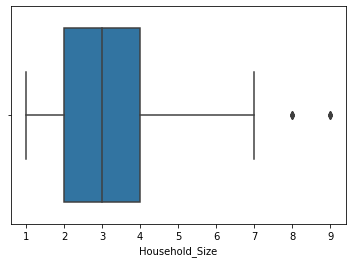

In [187]:
# Household Size boxplot outliers data test
sns.boxplot(x='Household_Size', data=df_test)

<AxesSubplot:xlabel='Household_Size'>

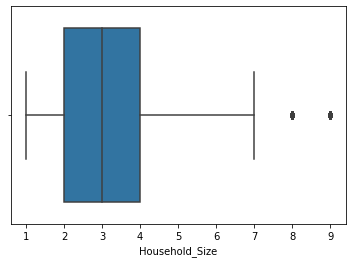

In [188]:
# Household Size boxplot outliers data test
sns.boxplot(x='Household_Size', data=df_train)

<AxesSubplot:xlabel='Household_Income'>

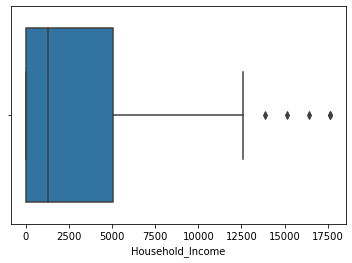

In [189]:
# Household Income boxplot outliers data test
sns.boxplot(x='Household_Income', data=df_test)

<AxesSubplot:xlabel='Household_Income'>

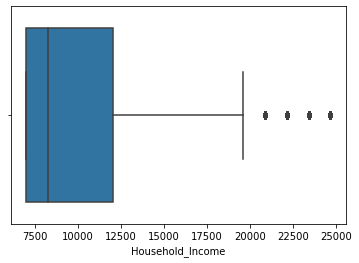

In [190]:
# Household Income boxplot outliers data test
sns.boxplot(x='Household_Income', data=df_train)

<AxesSubplot:xlabel='Household_Size'>

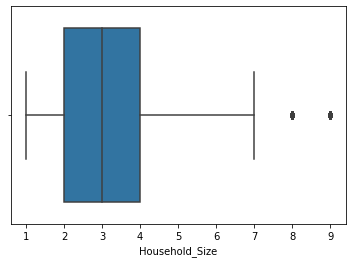

In [191]:
# Household Size boxplot outliers data train
sns.boxplot(x='Household_Size', data=df_train)

<AxesSubplot:xlabel='Household_Income'>

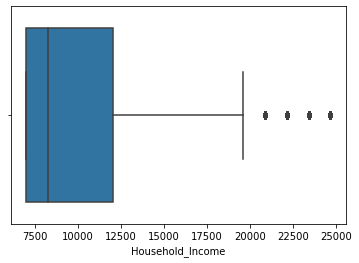

In [192]:
# Household Income boxplot outliers data train
sns.boxplot(x='Household_Income', data=df_train)

In [193]:
#Zscore for Household Income, showing the values of outliers

data=df_train['Household_Income']
mean=np.mean(data)
std=np.std(data)
treshold=3
outlier=[]
for i in data:
    z=(i-mean)/std
    if z>treshold:
        outlier.append(i)
        outlier.sort()
print('Outliers of the dataset are:', outlier) 

Outliers of the dataset are: [23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 23393, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654]


In [194]:
#Zscore for Household Size, showing the values of outliers

data=df_train['Household_Size']
mean=np.mean(data)
std=np.std(data)
treshold=3
outlier=[]
for i in data:
    z=(i-mean)/std
    if z>treshold:
        outlier.append(i)
        outlier.sort()
print('Outliers of the dataset are:', outlier) 

Outliers of the dataset are: [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]


In [195]:
#Zscore for Household Income, showing the values of outliers

data=df_train['Household_Income']
mean=np.mean(data)
std=np.std(data)
treshold=3
outlier=[]
for i in data:
    z=(i-mean)/std
    if z>treshold:
        outlier.append(i)
        outlier.sort()
print('Outliers of the dataset are:', len(outlier))

Outliers of the dataset are: 90


In [196]:
#Zscore for Household Size, showing the values of outliers

data=df_train['Household_Size']
mean=np.mean(data)
std=np.std(data)
treshold=3
outlier=[]
for i in data:
    z=(i-mean)/std
    if z>treshold:
        outlier.append(i)
        outlier.sort()
print('Outliers of the dataset are:', len(outlier)) 

Outliers of the dataset are: 91


### Removing outliers (using Z-Score method and removing specific rows) - Substituir df_train por df_train_shape

In [197]:
Q1_Household_Size = df_train.Household_Size.quantile(0.25)
Q3_Household_Size = df_train.Household_Size.quantile(0.75)
Q1_Household_Size,Q3_Household_Size

(2.0, 4.0)

In [198]:
IQR_Household_Size = Q3_Household_Size-Q1_Household_Size
IQR_Household_Size

2.0

In [199]:
lower_limit_Household_Size = Q1_Household_Size - 1.5*IQR_Household_Size
upper_limit_Household_Size = Q3_Household_Size + 1.5*IQR_Household_Size
lower_limit_Household_Size, upper_limit_Household_Size

(-1.0, 7.0)

In [200]:
df_train_clean=df_train[(df_train.Household_Size>lower_limit_Household_Size)& (df_train.Household_Size<outlier[0])]
df_train_clean.shape

(7579, 16)

(7579, 16)

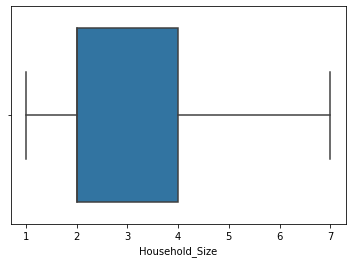

In [201]:
#Outliers removed from Household Size
sns.boxplot(x='Household_Size', data=df_train_clean)
df_train_clean.shape 

In [202]:
Q1_Household_Income = df_train.Household_Income.quantile(0.25)
Q3_Household_Income = df_train.Household_Income.quantile(0.75)
Q1_Household_Income,Q3_Household_Income

(7000.0, 12044.0)

In [203]:
IQR_Household_Income = Q3_Household_Income-Q1_Household_Income
IQR_Household_Income

5044.0

In [204]:
lower_limit_Household_Income = Q1_Household_Income - 1.5*IQR_Household_Income
upper_limit_Household_Income = Q3_Household_Income + 1.5*IQR_Household_Income
lower_limit_Household_Income, upper_limit_Household_Income

(-566.0, 19610.0)

In [205]:
# Check counts of categorical variables data test
cols = ['Gender']
df_test[cols].apply(pd.Series.value_counts)

,Gender
Male,248
Female,245


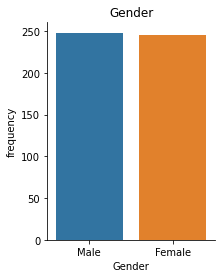

In [206]:
#Bar chart Gender Data test

fig, ax = plt.subplots(figsize=(3,4))
g = sns.countplot(data=df_test, x=df_test['Gender'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Gender")
plt.xlabel("Gender")
plt.ylabel("frequency")
plt.rc('axes')

In [207]:
# Check counts of categorical variables data train

cols = ['Gender']
df_train[cols].apply(pd.Series.value_counts)

,Gender
Male,4392
Female,3608


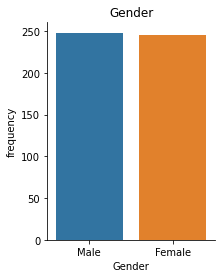

In [208]:
#Bar chart Foreign Citizenship Data train

fig, ax = plt.subplots(figsize=(3,4))
g = sns.countplot(data=df_test, x=df_test['Gender'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Gender")
plt.xlabel("Gender")
plt.ylabel("frequency")
plt.rc('axes')

In [209]:
# Check counts of categorical variables data test
cols = ['Foreign_Citizenship']
df_test[cols].apply(pd.Series.value_counts)

,Foreign_Citizenship
Yes,270
No,216


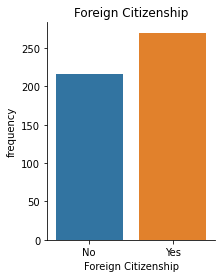

In [210]:
#Bar chart Foreign Citizenship Data test

fig, ax = plt.subplots(figsize=(3,4))
g = sns.countplot(data=df_test, x=df_test['Foreign_Citizenship'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Foreign Citizenship")
plt.xlabel("Foreign Citizenship")
plt.ylabel("frequency")
plt.rc('axes')

In [211]:
# Check counts of categorical variables data train
cols = ['Foreign_Citizenship']
df_train[cols].apply(pd.Series.value_counts)

,Foreign_Citizenship
Yes,4632
No,3230


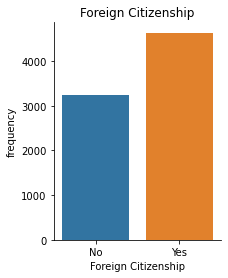

In [212]:
#Bar chart Foreign Citizenship Data train

fig, ax = plt.subplots(figsize=(3,4))
g = sns.countplot(data=df_train, x=df_train['Foreign_Citizenship'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Foreign Citizenship")
plt.xlabel("Foreign Citizenship")
plt.ylabel("frequency")
plt.rc('axes')

In [213]:
# Check counts of categorical variables data test
cols = ['Area_Residence']
df_test[cols].apply(pd.Series.value_counts)

,Area_Residence
City,432
Country-side,53


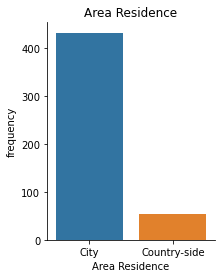

In [214]:
#Bar chart Area Residence Data test

fig, ax = plt.subplots(figsize=(3,4))
g = sns.countplot(data=df_test, x=df_test['Area_Residence'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Area Residence")
plt.xlabel("Area Residence")
plt.ylabel("frequency")
plt.rc('axes')

In [215]:
# Check counts of categorical variables data train
cols = ['Area_Residence']
df_train[cols].apply(pd.Series.value_counts)

,Area_Residence
City,6838
Country-side,1086


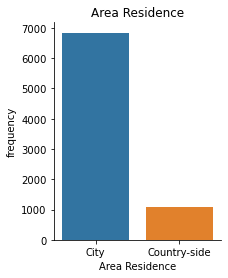

In [216]:
#Bar chart Area Residence Data train

fig, ax = plt.subplots(figsize=(3,4))
g = sns.countplot(data=df_train, x=df_train['Area_Residence'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Area Residence")
plt.xlabel("Area Residence")
plt.ylabel("frequency")
plt.rc('axes')

In [217]:
# Check counts of categorical variables data test
cols = ['Age']
df_test[cols].apply(pd.Series.value_counts)

,Age
26,21
42,18
25,18
30,17
38,17
...,...
81,1
77,1
24,1
72,1


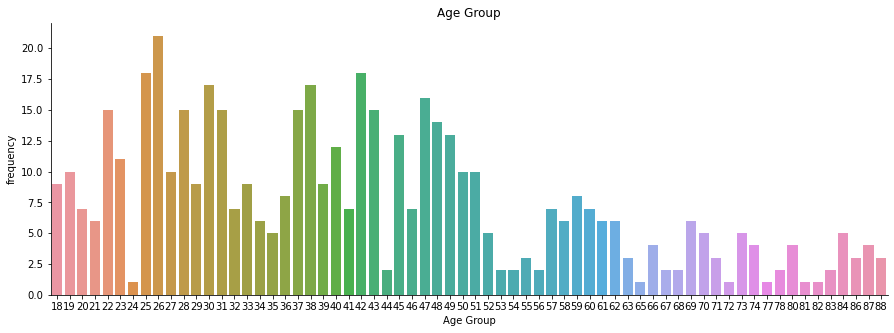

In [218]:
#Bar chart Age Group

fig, ax = plt.subplots(figsize=(15,5))
g = sns.countplot(data=df_test, x=df_test['Age'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Age Group")
plt.xlabel("Age Group")
plt.ylabel("frequency")
plt.rc('axes')

In [219]:
# Check counts of categorical variables data train
cols = ['Age']
df_train[cols].apply(pd.Series.value_counts)

,Age
35,250
42,232
37,232
33,231
40,227
...,...
78,29
87,28
76,27
80,24


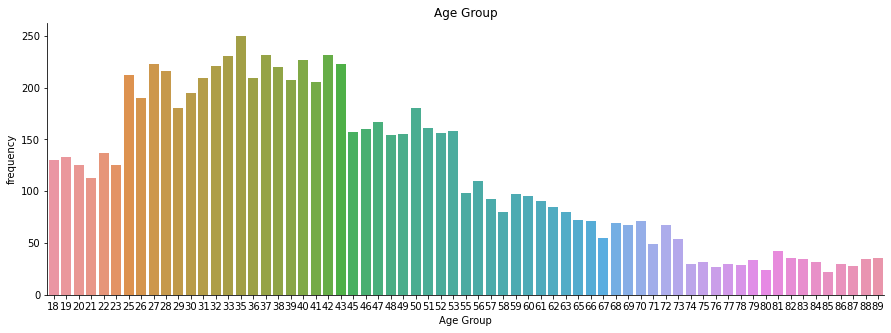

In [220]:
#Bar chart Age Group

fig, ax = plt.subplots(figsize=(15,5))
g = sns.countplot(data=df_train, x=df_train['Age'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Age Group")
plt.xlabel("Age Group")
plt.ylabel("frequency")
plt.rc('axes')

In [221]:
# Check counts of categorical variables data test
cols = ['Frequent_Traveler']
df_test[cols].apply(pd.Series.value_counts)


,Frequent_Traveler
Yes,306
No,184


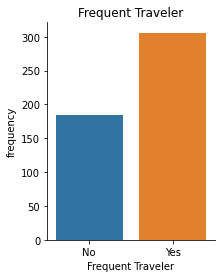

In [222]:
#Bar chart Frequent Traveler data test

fig, ax = plt.subplots(figsize=(3,4))
g = sns.countplot(data=df_test, x=df_test['Frequent_Traveler'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Frequent Traveler")
plt.xlabel("Frequent Traveler")
plt.ylabel("frequency")
plt.rc('axes')

In [223]:
# Check counts of categorical variables data train
cols = ['Frequent_Traveler']
df_train[cols].apply(pd.Series.value_counts)


,Frequent_Traveler
Yes,4938
No,2985


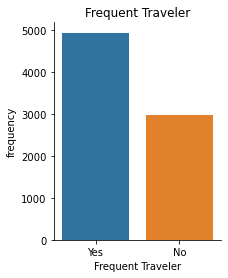

In [224]:
#Bar chart Frequent Traveler data train

fig, ax = plt.subplots(figsize=(3,4))
g = sns.countplot(data=df_train, x=df_train['Frequent_Traveler'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Frequent Traveler")
plt.xlabel("Frequent Traveler")
plt.ylabel("frequency")
plt.rc('axes')

In [225]:
# Check counts of categorical variables data test
cols = ['Cellphone_Usage']
df_test[cols].apply(pd.Series.value_counts)

,Cellphone_Usage
Low,305
Average,129
High,59


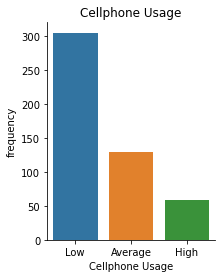

In [226]:
#Bar chart Cellphone Usage data test

fig, ax = plt.subplots(figsize=(3,4))
g = sns.countplot(data=df_test, x=df_test['Cellphone_Usage'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Cellphone Usage")
plt.xlabel("Cellphone Usage")
plt.ylabel("frequency")
plt.rc('axes')

In [227]:
# Check counts of categorical variables data train
cols = ['Cellphone_Usage']
df_train[cols].apply(pd.Series.value_counts)

,Cellphone_Usage
Low,4815
Average,1971
High,1214


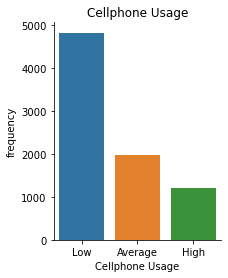

In [228]:
#Bar chart Cellphone Usage data train

fig, ax = plt.subplots(figsize=(3,4))
g = sns.countplot(data=df_train, x=df_train['Cellphone_Usage'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Cellphone Usage")
plt.xlabel("Cellphone Usage")
plt.ylabel("frequency")
plt.rc('axes')

In [229]:
# Check counts of categorical variables data test
cols = ['Household_Size']
df_test[cols].apply(pd.Series.value_counts)

,Household_Size
2.0,141
3.0,98
1.0,82
4.0,81
5.0,45
6.0,15
7.0,6
8.0,4
9.0,4


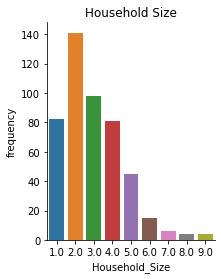

In [230]:
#Bar chart Cellphone Usage data test

fig, ax = plt.subplots(figsize=(3,4))
g = sns.countplot(data=df_test, x=df_test['Household_Size'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Household Size")
plt.xlabel("Household_Size")
plt.ylabel("frequency")
plt.rc('axes')

In [231]:
# Check counts of categorical variables data train
cols = ['Household_Size']
df_train[cols].apply(pd.Series.value_counts)

,Household_Size
2.0,2382
3.0,1480
1.0,1444
4.0,1365
5.0,606
6.0,207
7.0,95
8.0,48
9.0,43


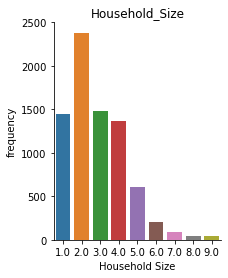

In [232]:
#Bar chart Household Size data train

fig, ax = plt.subplots(figsize=(3,4))
g = sns.countplot(data=df_train, x=df_train['Household_Size'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Household_Size")
plt.xlabel("Household Size")
plt.ylabel("frequency")
plt.rc('axes')

In [233]:
# Check counts of categorical variables data test
cols = ['Household_Income']
df_test[cols].apply(pd.Series.value_counts)

,Household_Income
0.0,147
1261.0,145
10088.0,30
11349.0,27
3783.0,23
6305.0,21
5044.0,20
2522.0,17
8827.0,12
7566.0,8


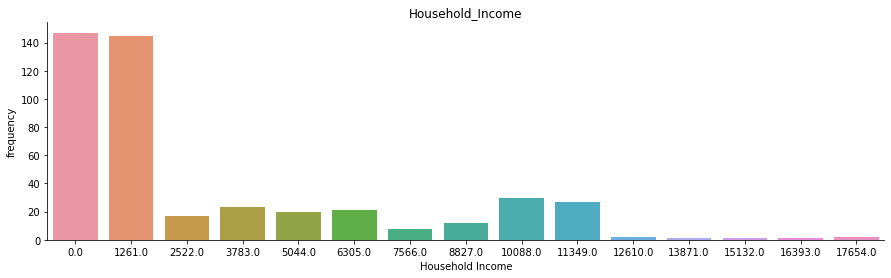

In [234]:
#Bar chart Household Income data test

fig, ax = plt.subplots(figsize=(15,4))
g = sns.countplot(data=df_test, x=df_test['Household_Income'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Household_Income")
plt.xlabel("Household Income")
plt.ylabel("frequency")
plt.rc('axes')

In [235]:
# Check counts of categorical variables data train
cols = ['Household_Income']
df_train[cols].apply(pd.Series.value_counts)

,Household_Income
7000,3122
8261,2334
18349,470
17088,454
9522,285
12044,253
10783,251
14566,202
15827,194
13305,194


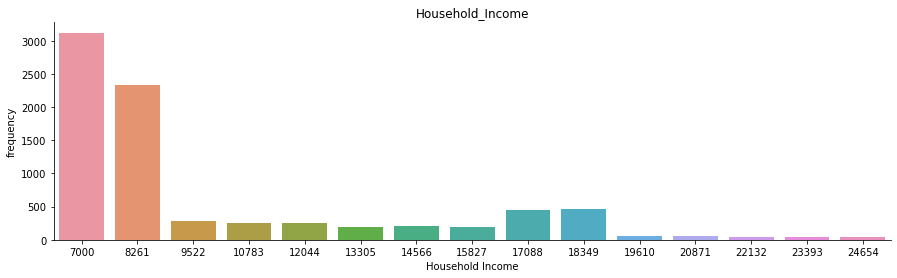

In [236]:
#Bar chart Household Income data train

fig, ax = plt.subplots(figsize=(15,4))
g = sns.countplot(data=df_train, x=df_train['Household_Income'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Household_Income")
plt.xlabel("Household Income")
plt.ylabel("frequency")
plt.rc('axes')

In [237]:
# Check counts of categorical variables data test
cols = ['Occupation']
df_test[cols].apply(pd.Series.value_counts)

,Occupation
Private company,349
Government,40
Self-employed,36
Public company,26
Student,24
Nothing,14


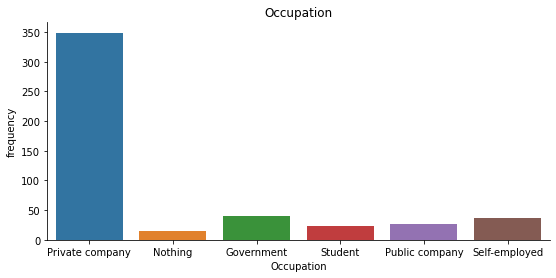

In [238]:
#Bar chart Occupation data test

fig, ax = plt.subplots(figsize=(9,4))
g = sns.countplot(data=df_test, x=df_test['Occupation'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Occupation")
plt.xlabel("Occupation")
plt.ylabel("frequency")
plt.rc('axes')

In [239]:
# Check counts of categorical variables data train
cols = ['Occupation']
df_train[cols].apply(pd.Series.value_counts)

,Occupation
Private company,5444
Government,680
Self-employed,623
Public company,598
Student,288
Nothing,243


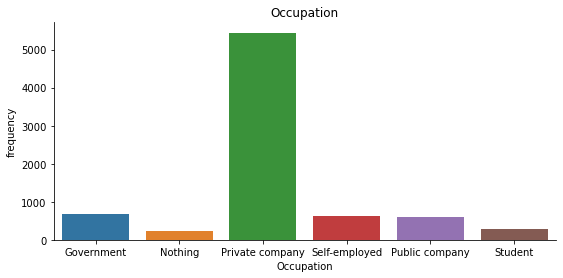

In [240]:
#Bar chart Occupation data train

fig, ax = plt.subplots(figsize=(9,4))
g = sns.countplot(data=df_train, x=df_train['Occupation'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Occupation")
plt.xlabel("Occupation")
plt.ylabel("frequency")
plt.rc('axes')

In [241]:
# Check counts of categorical variables data test
cols = ['Political_Participation']
df_test[cols].apply(pd.Series.value_counts)

,Political_Participation
No involvement,178
Unknown,169
Some involvement,91
Strong involvement,51


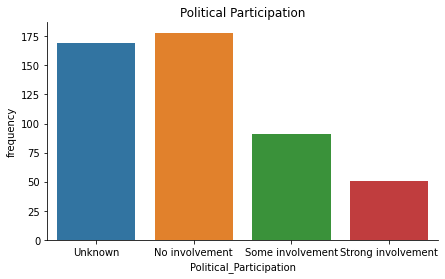

In [242]:
#Bar chart Political Participation data test

fig, ax = plt.subplots(figsize=(7,4))
g = sns.countplot(data=df_test, x=df_test['Political_Participation'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Political Participation")
plt.xlabel("Political_Participation")
plt.ylabel("frequency")
plt.rc('axes')

In [243]:
# Check counts of categorical variables data train
cols = ['Political_Participation']
df_train[cols].apply(pd.Series.value_counts)

,Political_Participation
No involvement,3125
Unknown,2505
Some involvement,1304
Strong involvement,942


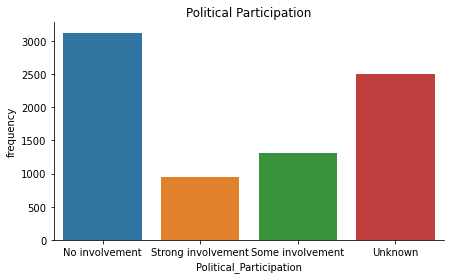

In [244]:
#Bar chart Political Participation data train

fig, ax = plt.subplots(figsize=(7,4))
g = sns.countplot(data=df_train, x=df_train['Political_Participation'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Political Participation")
plt.xlabel("Political_Participation")
plt.ylabel("frequency")
plt.rc('axes')

In [245]:
# Check counts of categorical variables data test
cols = ['Satisfaction_Level']
df_test[cols].apply(pd.Series.value_counts)

,Satisfaction_Level
1.0,156
2.0,139
3.0,72
4.0,53
5.0,34
6.0,9
7.0,6
8.0,4
9.0,3


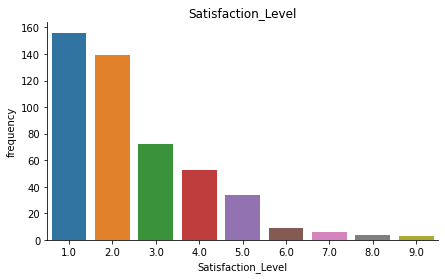

In [246]:
#Bar chart Satisfaction_Level data test

fig, ax = plt.subplots(figsize=(7,4))
g = sns.countplot(data=df_test, x=df_test['Satisfaction_Level'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Satisfaction_Level")
plt.xlabel("Satisfaction_Level")
plt.ylabel("frequency")
plt.rc('axes')

In [247]:
# Check counts of categorical variables data train
cols = ['Satisfaction_Level']
df_train[cols].apply(pd.Series.value_counts)

,Satisfaction_Level
2.0,2482
1.0,2147
3.0,1122
4.0,906
5.0,514
6.0,182
7.0,127
8.0,99
9.0,91


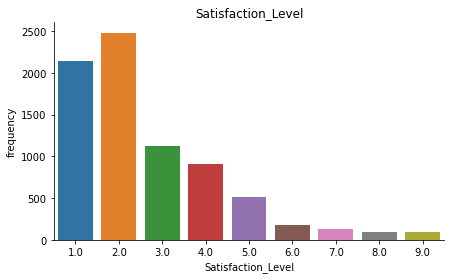

In [248]:
#Bar chart Satisfaction_Level data train

fig, ax = plt.subplots(figsize=(7,4))
g = sns.countplot(data=df_train, x=df_train['Satisfaction_Level'])

# Decoration
fmt = "{x:,.0f}"
sns.despine()
plt.title("Satisfaction_Level")
plt.xlabel("Satisfaction_Level")
plt.ylabel("frequency")
plt.rc('axes')

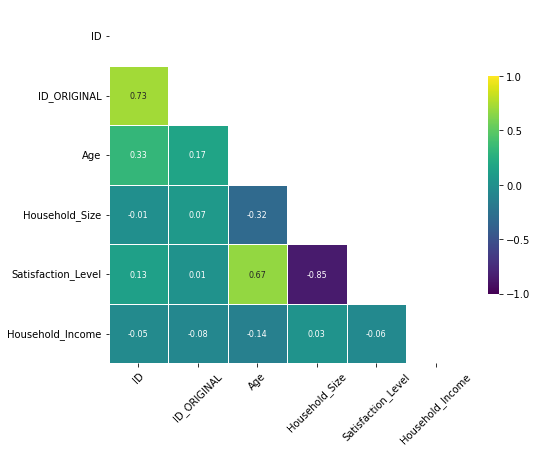

In [249]:
# CORRELATION

# Create correlation matrix
#corr = df_test[numerical].corr(method='spearman')
corr = df_test.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

# Draw
fig , ax = plt.subplots(figsize=(8, 10))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'viridis',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt='.2f',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 8})

# Decoration
#plt.title("Spearman correlation between numeric variables", 12)
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 45)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})





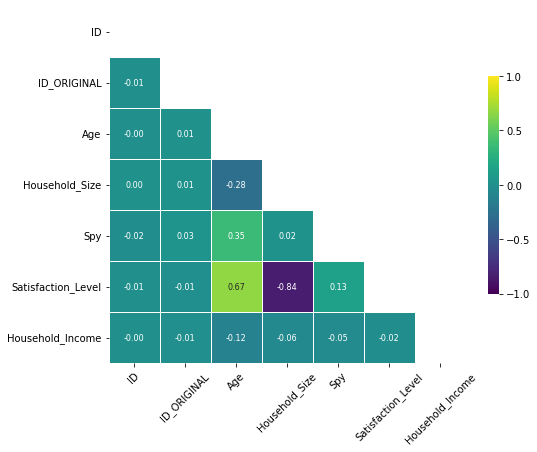

In [250]:
# CORRELATION

# Create correlation matrix
#corr = df_train[numerical].corr(method='spearman')
corr = df_train.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

# Draw
fig , ax = plt.subplots(figsize=(8, 10))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'viridis',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt='.2f',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 8})

# Decoration
#plt.title("Spearman correlation between numeric variables", 12)
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 45)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


In [251]:
df_train_prep, X, y, X_train, X_test, y_train, y_test = prepare_data(df_train,df_train)
df_test_prep, X_val, y_, X_train_, X_test_, y_train_, y_test_ = prepare_data(df_train,df_test)

# Modeling

In [252]:
# Build class to store models and parameters
import xgboost as xgb
from sklearn.dummy import DummyClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from skopt.space import Real, Categorical, Integer
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier


class classification_models:
    def __init__(self):
        self.baseline = self.baseline()
        self.svc = self.svc()
        self.naive_bayes = self.naive_bayes()
        self.knn = self.knn()
        self.logistic_regression = self.logistic_regression()
        self.xgboost = self.xgboost()
        self.ada = self.ada()
        self.lgb = self.lgb()


class baseline:
    model = DummyClassifier()

    parameters = {
                   'model__strategy': ['uniform'],
                   'model__random_state': [8]
                 }

    @staticmethod
    def best_model(params):
        clf = DummyClassifier(**params)
        return clf


class svc:
    model = svm.SVC()

    parameters = {'model__C': [0.1, 1, 10, 100],
                  'model__gamma': [1, 0.1, 0.01, 0.001],
                  'model__kernel': ['rbf', 'poly', 'sigmoid']}

    @staticmethod
    def best_model(params):
        clf = svm.SVC(**params)
        return clf


class naive_bayes:
    model = GaussianNB()

    parameters = {
                'model__var_smoothing': [1e-2, 1e-4, 1e-6,1e-8,1e-10,1e-12,1e-14,1e-16]
                 }

    @staticmethod
    def best_model(params):
        clf = GaussianNB(**params)
        return clf

class knn:
    model = KNeighborsClassifier()

    parameters = {'model__n_neighbors': Integer(3, 100),
                  'model__weights': Categorical(categories=['uniform', 'distance']),
                  'model__algorithm': Categorical(categories=['auto', 'ball_tree', 'kd_tree', 'brute']),
                  'model__leaf_size': Integer(5, 50)
                  }

    @staticmethod
    def best_model(params):
        clf = KNeighborsClassifier()
        return clf

class logistic_regression:
    model = LogisticRegression()

    parameters = {
                   'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                   'model__C': [1e-2, 1e-4, 0.01, 0.1,0.3, 0.5,0.8, 1],
                   'model__random_state': [8]
                 }

    @staticmethod
    def best_model(params):
        clf = LogisticRegression(**params)
        return clf

class xgboost:
    model = xgb.XGBClassifier()

    parameters = {
                   'model__learning_rate': Real(0.01,1.0,'uniform'),
                   'model__max_depth': Integer(2, 100),
                   'model__min_samples_leaf': Integer(2, 100),
                   'model__min_samples_split': Integer(2, 100),
                   'model__subsample': Real(0.1,1.0,'uniform'),
                   'model__n_estimators': Integer(10, 500),
                   'model__random_state': [16],
                 }


    @staticmethod
    def best_model(params):
        clf = xgb.XGBClassifier(**params)
        return clf



class ada:
    model = AdaBoostClassifier()

    parameters = {
                   'model__learning_rate': Real(0.01,1.0,'uniform'),
                   'model__n_estimators': Integer(10, 500),
                   'model__random_state': [16],
                 }


    @staticmethod
    def best_model(params):
        clf = AdaBoostClassifier(**params)
        return clf
    
class lgb:
    model = lgb.LGBMClassifier()

    parameters = {
                   'model__learning_rate': Real(0.01,1.0,'uniform'),
                   'model__max_depth': Integer(2, 100),
                   'model__min_samples_leaf': Integer(2, 100),
                   'model__min_samples_split': Integer(2, 100),
                   'model__subsample': Real(0.1,1.0,'uniform'),
                   'model__n_estimators': Integer(10, 500),
                   'model__random_state': [16],
                 }


    @staticmethod
    def best_model(params):
        clf = lgb.LGBMClassifier(**params)
        return clf

In [253]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# Function to build models
def build_model(X,y,niter,model_list=list):
    '''model_list = [baseline, svc, naive_bayes, knn, logistic_regression, xgboost]'''
    gsearchs = []
    best_models = []
    scores = []
    best_params = []
    cv_results = []
    
    print('---------------- MODEL TRAINING ----------------')
    
    for i in model_list:
        
        string = str(i)
        model_name_ = string[string.find('.')+1:]
        model_name = model_name_[0:model_name_.find('>')-1].strip()       
        print('\nModel: ', model_name)
        
        # Get model
        model = i.model
        
        # Import RFE
        #select = RFE(model, n_features_to_select=5, step=1)
        #select = RFECV(model, step=1, min_features_to_select=7,scoring='f1')
        select = SelectKBest(f_classif, k=10)
        
        # Create pipeline
        pipe = Pipeline([('scaler', MinMaxScaler()),('selector', select),('model',model)])
        #pipe = Pipeline([('scaler', MinMaxScaler()),('model',model)])
        #pipe = Pipeline([('model',model)])
    
        # Get hyperparameter grid
        param_search = i.parameters
        
        # Stratified k-fold cross-validation
        skf = StratifiedKFold(n_splits=5)
        my_cv = [(train,test) for train, test in skf.split(X,y)]
        
        gsearch = BayesSearchCV(pipe, cv=skf, search_spaces=param_search, n_jobs=10,scoring='f1',
                                     verbose=True,refit=True,n_iter=niter)
        
        #gsearch = BayesSearchCV(pipe, search_spaces=param_search, n_jobs=10,scoring='f1',
        #                             verbose=True,n_iter=niter)
        
        gsearch.fit(X, y)
        
        '''sorted_idx = gsearch.best_estimator_.named_steps["model"].feature_importances_.argsort()
        plt.barh(X.columns[sorted_idx], gsearch.best_estimator_.named_steps["model"].feature_importances_[sorted_idx])
        plt.xlabel("Xgboost Feature Importance")'''
        
        
        gsearchs.append(gsearch)
        best_models.append(gsearch.best_estimator_)
        scores.append(gsearch.best_score_)
        best_params.append(gsearch.best_params_)
        cv_results.append(gsearch.cv_results_)
        
        print('CV accuracy for model {0}: {1}'.format(model_name,gsearch.best_score_))
        
    return gsearchs,best_models,scores,best_params,cv_results

In [254]:
model_list=[lgb] # [svc, naive_bayes, knn, xgboost, ada, lgb]
gsearchs,best_models,scores,best_params,cv_results = build_model(X_train,y_train, 100,model_list)


---------------- MODEL TRAINING ----------------

Model:  lgb
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5

In [255]:
print(scores)

[0.7386214671820486]


In [267]:
selected_features

,support
Age,True
Household_Size,False
Satisfaction_Level,False
Household_Income,True
CD_Gender,False
CD_Foreign_Citizenship,True
CD_Frequent_Traveler,True
CD_Cellphone_Usage,True
CD_Occupation,False
CD_Political_Participation,True


In [257]:
best_models

[Pipeline(steps=[('scaler', MinMaxScaler()), ('selector', SelectKBest()),
                 ('model',
                  LGBMClassifier(learning_rate=0.01, max_depth=2,
                                 min_samples_leaf=49, min_samples_split=13,
                                 n_estimators=193, random_state=16,
                                 subsample=0.5658606452764399))])]

## Performance Assessment

In [263]:
# Function to evaluate models
def evaluate_model(X_test, X_train,y_train, y_test, best_models):
    
    acc_results = []
    f1_results = []
    
    print('---------------- MODEL EVALUATION - TRAIN ----------------')
    
    model_counter = 1
    for i in best_models:
        
        string = str(i)
        model_name_ = string[string.find(''''model',''')+len(''''model', '''):]
        model_name = model_name_[0:model_name_.find('(')].strip() 
        print('\nModel #{0}: {1}'.format(model_counter,model_name))
        
        # Predict
        y_pred = i.predict(X_test)        
        df_pred = pd.DataFrame(data=y_pred, columns=['Spy'],index=y_test.index)
        
        # Evaluation metrics
        accuracy = metrics.accuracy_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred, average=None)  
        precision = precision_score(y_test, y_pred, average=None)
        recall = recall_score(y_test, y_pred, average=None)
        
        
        # Labels to binarize
        labels = [0, 1, 2]

        # Binarize ytest with shape (n_samples, n_classes)
        ytest = label_binarize(y_test, classes=labels)

        # Binarize ypreds with shape (n_samples, n_classes)
        ypreds = label_binarize(y_pred, classes=labels)
        
        # Get roc auc result
        #roc_auc = roc_auc_score(ytest, ypreds, average=None)
        roc_auc = 0
        
        acc_results.append(accuracy)
        f1_results.append(f1)
        
        print('Accuracy: ',accuracy)
        print('Average F1 Score: ',f1.mean())
        print('F1 Score by Class: ',f1)
        print('Average Precision: ',precision.mean())
        print('Precision by Class: ',precision)
        print('Average Recall: ',recall)
        print('Recall by Class: ',recall.mean())
        print('ROC AUC score by Class: ',roc_auc)
        #print('Average ROC AUC score: ',roc_auc.mean())
        print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred))
        print('\nClassification Report:\n',classification_report(y_test, y_pred))
        
        model_counter+=1
    
    # Get best model based on accuracy score
    maxi_model_nb = acc_results.index(max(acc_results))
    
    maxi_model = best_models[maxi_model_nb]
    string_ = str(maxi_model)
    maxi_model_name_ = string_[string_.find(''''model',''')+len(''''model', '''):]
    maxi_model_name = maxi_model_name_[0:maxi_model_name_.find('(')].strip() 
    
    
    print('\nBest Model: #{0} {1}'.format(maxi_model_nb+1,maxi_model_name))
    
    
    return acc_results,f1_results, maxi_model

acc_results,f1_results,maxi_model = evaluate_model(X_train, X_train, y_train, y_train, best_models)

---------------- MODEL EVALUATION - TRAIN ----------------

Model #1: LGBMClassifier
Accuracy:  0.7507462686567165
Average F1 Score:  0.7501027372784448
F1 Score by Class:  [0.76278409 0.73742138]
Average Precision:  0.7502815919330615
Precision by Class:  [0.75847458 0.74208861]
Average Recall:  [0.76714286 0.7328125 ]
Recall by Class:  0.7499776785714285
ROC AUC score by Class:  0

Confusion Matrix:
 [[2148  652]
 [ 684 1876]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      2800
           1       0.74      0.73      0.74      2560

    accuracy                           0.75      5360
   macro avg       0.75      0.75      0.75      5360
weighted avg       0.75      0.75      0.75      5360


Best Model: #1 LGBMClassifier


In [258]:
# Function to evaluate models
def evaluate_model(X_test, X_train,y_train, y_test, best_models):
    
    acc_results = []
    f1_results = []
    
    print('---------------- MODEL EVALUATION ----------------')
    
    model_counter = 1
    for i in best_models:
        
        string = str(i)
        model_name_ = string[string.find(''''model',''')+len(''''model', '''):]
        model_name = model_name_[0:model_name_.find('(')].strip() 
        print('\nModel #{0}: {1}'.format(model_counter,model_name))
        
        # Predict
        y_pred = i.predict(X_test)        
        df_pred = pd.DataFrame(data=y_pred, columns=['Spy'],index=y_test.index)
        
        # Evaluation metrics
        accuracy = metrics.accuracy_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred, average=None)  
        precision = precision_score(y_test, y_pred, average=None)
        recall = recall_score(y_test, y_pred, average=None)
        
        
        # Labels to binarize
        labels = [0, 1, 2]

        # Binarize ytest with shape (n_samples, n_classes)
        ytest = label_binarize(y_test, classes=labels)

        # Binarize ypreds with shape (n_samples, n_classes)
        ypreds = label_binarize(y_pred, classes=labels)
        
        # Get roc auc result
        #roc_auc = roc_auc_score(ytest, ypreds, average=None)
        roc_auc = 0
        
        acc_results.append(accuracy)
        f1_results.append(f1)
        
        print('Accuracy: ',accuracy)
        print('Average F1 Score: ',f1.mean())
        print('F1 Score by Class: ',f1)
        print('Average Precision: ',precision.mean())
        print('Precision by Class: ',precision)
        print('Average Recall: ',recall)
        print('Recall by Class: ',recall.mean())
        print('ROC AUC score by Class: ',roc_auc)
        #print('Average ROC AUC score: ',roc_auc.mean())
        print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred))
        print('\nClassification Report:\n',classification_report(y_test, y_pred))
        
        model_counter+=1
    
    # Get best model based on accuracy score
    maxi_model_nb = acc_results.index(max(acc_results))
    
    maxi_model = best_models[maxi_model_nb]
    string_ = str(maxi_model)
    maxi_model_name_ = string_[string_.find(''''model',''')+len(''''model', '''):]
    maxi_model_name = maxi_model_name_[0:maxi_model_name_.find('(')].strip() 
    
    
    print('\nBest Model: #{0} {1}'.format(maxi_model_nb+1,maxi_model_name))
    
    
    return acc_results,f1_results, maxi_model

In [259]:
acc_results,f1_results,maxi_model = evaluate_model(X_test, X_train, y_train, y_test, best_models)

---------------- MODEL EVALUATION ----------------

Model #1: LGBMClassifier
Accuracy:  0.7503787878787879
Average F1 Score:  0.7495594733631994
F1 Score by Class:  [0.76388391 0.73523503]
Average Precision:  0.7500357567984055
Precision by Class:  [0.75495751 0.74511401]
Average Recall:  [0.77302393 0.72561459]
Recall by Class:  0.7493192609891548
ROC AUC score by Class:  0

Confusion Matrix:
 [[1066  313]
 [ 346  915]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      1379
           1       0.75      0.73      0.74      1261

    accuracy                           0.75      2640
   macro avg       0.75      0.75      0.75      2640
weighted avg       0.75      0.75      0.75      2640


Best Model: #1 LGBMClassifier


## Submission

In [261]:
# Predict
y_pred = maxi_model.predict(X_val)        
df_pred = pd.DataFrame(data=y_pred, columns=['Spy'],index=X_val.index)

df_submission = df_test_prep[['ID_ORIGINAL']].merge(df_pred, how='inner', left_index=True, right_index=True, indicator=False)
df_submission = df_submission.set_index('ID_ORIGINAL')
df_submission.to_csv('submission-lgb-best-age.csv')
df_submission

,Spy
ID_ORIGINAL,
460139,0
460648,0
460835,0
461613,0
461721,0
...,...
473596,0
477769,1
475292,1
